In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from pyautofit.data import AutoFitDataset
from pyautofit.config import AutoFitConfig
from pyautofit.model import AutoFitModel

In [2]:
config = AutoFitConfig.from_json('configs/autofit_config.json')

In [3]:
config.to_dict()

{'name': 'autofit_demo',
 'version': 'demo',
 'classifier_config': {'max_depth': 1,
  'n_estimators': 600,
  'learning_rate': 0.05,
  'objective': 'binary:logistic',
  'booster': 'gbtree',
  'n_jobs': 1,
  'eval_metric': 'auc',
  'early_stopping_rounds': 50,
  'random_state': 2333},
 'dataset_config': {'id_col': 'index',
  'flag_col': 'gbf',
  'instance_weight_col': 'weight',
  'categorical_cols': ['feat_cat']},
 'binning_config': {'method': 'num_bads', 'max_bins': 50, 'min_bads': 10}}

In [4]:
afds = AutoFitDataset.from_csv('demo.csv', config.dataset_config)

In [5]:
afds.df.head()

,index,feat_1,feat_2,feat_3,feat_4,feat_5,gbf,weight,feat_cat
0,0,0.0,0.0,2.777778,0.0,0.967762,1,4,c
1,1,0.0,0.0,6.000000,0.0,0.980904,1,9,a
2,2,0.0,0.0,4.000000,0.0,1.139252,0,2,a
3,3,0.0,0.0,4.555556,0.0,1.065789,1,9,b
4,4,1.0,4.0,0.000000,8.0,1.261156,1,8,d


In [6]:
model = AutoFitModel('demo', config=config, version='demo')

In [7]:
model.auto_binning(afds, binning_config=config.binning_config)

In [31]:
model.features_to_csv()

,bins,points,is_categorical,bads,bads_pct,goods,goods_pct,counts,counts_pct,bad_rate,woe,iv,is_monotonic,feature
0,"(-inf, 0.0312]",None,False,266,0.144330,1172,0.143716,1438,0.143829,0.184979,-0.004266,0.033376,None,feat_3
1,"(0.0312, 0.13]",None,False,31,0.016820,122,0.014960,153,0.015303,0.202614,-0.117203,0.033376,None,feat_3
2,"(0.13, 0.211]",None,False,33,0.017906,146,0.017903,179,0.017904,0.184358,-0.000137,0.033376,None,feat_3
3,"(0.211, 0.3]",None,False,32,0.017363,128,0.015696,160,0.016003,0.200000,-0.100942,0.033376,None,feat_3
4,"(0.3, 0.357]",None,False,51,0.027672,171,0.020969,222,0.022204,0.229730,-0.277399,0.033376,None,feat_3
5,"(0.357, 0.522]",None,False,45,0.024417,243,0.029798,288,0.028806,0.156250,0.199162,0.033376,None,feat_3
6,"(0.522, 0.684]",None,False,62,0.033641,209,0.025628,271,0.027105,0.228782,-0.272037,0.033376,None,feat_3
7,"(0.684, 0.867]",None,False,31,0.016820,135,0.016554,166,0.016603,0.186747,-0.015949,0.033376,None,feat_3
8,"(0.867, 1.083]",None,False,93,0.050461,348,0.042673,441,0.044109,0.210884,-0.167634,0.033376,None,feat_3
9,"(1.083, 1.35]",None,False,44,0.023874,213,0.026119,257,0.025705,0.171206,0.089866,0.033376,None,feat_3


In [8]:
df_bined = model.replace_value(afds)

In [9]:
df_bined.head()

,feat_3,feat_1,feat_2,feat_5,feat_4,feat_cat,index,gbf,weight
0,3.0950,1.0,1.0,0.970,1.0,c,0,1,4
1,6.6000,1.0,1.0,0.981,1.0,a,1,1,9
2,4.1430,1.0,1.0,1.153,1.0,a,2,0,2
3,4.7140,1.0,1.0,1.067,1.0,b,3,1,9
4,0.0312,1.0,4.0,1.271,13.0,d,4,1,8


In [10]:
df_bined['feat_cat'] = df_bined['feat_cat'].astype('category')

In [11]:
x_cols = ['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_cat', 'weight']
y_col = ['gbf']

In [20]:
params = dict(
    num_leaves=3,
    max_depth=1,
    learning_rate=.05,
    n_estimators=2000, 
    monotone_constraints=[1, 0, -1, 1, 1, 0]
)
clf = LGBMClassifier(**params)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_bined[x_cols], df_bined[y_col], test_size=.2)

In [22]:
fit_params = dict(
    X = X_train.drop(columns=['weight']), 
    y = y_train, 
    sample_weight=X_train['weight'],
    categorical_feature='auto',
    eval_set = (X_test.drop(columns=['weight']), y_test),
    eval_sample_weight=[X_test['weight']],
    eval_metric = 'auc'
)

In [23]:
clf.fit(**fit_params)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.504758	valid_0's binary_logloss: 0.482457
[2]	valid_0's auc: 0.520977	valid_0's binary_logloss: 0.482373
[3]	valid_0's auc: 0.520977	valid_0's binary_logloss: 0.482353
[4]	valid_0's auc: 0.520977	valid_0's binary_logloss: 0.482278
[5]	valid_0's auc: 0.522491	valid_0's binary_logloss: 0.482213
[6]	valid_0's auc: 0.520977	valid_0's binary_logloss: 0.482199
[7]	valid_0's auc: 0.522491	valid_0's binary_logloss: 0.482141
[8]	valid_0's auc: 0.520977	valid_0's binary_logloss: 0.482133
[9]	valid_0's auc: 0.522583	valid_0's binary_logloss: 0.482108
[10]	valid_0's auc: 0.521883	valid_0's binary_logloss: 0.482166
[11]	valid_0's auc: 0.52243	valid_0's binary_logloss: 0.482106
[12]	valid_0's auc: 0.522573	valid_0's binary_logloss: 0.482088
[13]	valid_0's auc: 0.522064	valid_0's binary_logloss: 0.482086
[14]	valid_0's auc: 0.523758	valid_0's binary_logloss: 0.482035
[15]	valid_0's auc: 0.522062	valid_0's binary_logloss: 0.482036
[16]	valid_0's auc: 0.523619	valid_0's binary_logl

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        monotone_constraints=[1, 0, -1, 1, 1, 0], n_estimators=2000,
        n_jobs=-1, num_leaves=3, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [30]:
clf.best_score_['valid_0']['auc']

0.5202749577796897

In [17]:
%matplotlib inline
from lightgbm import plot_tree, plot_importance

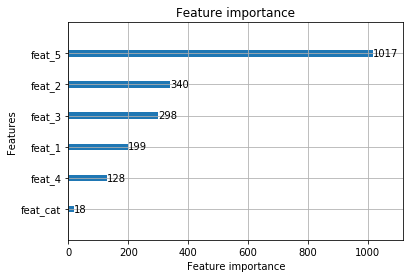

In [18]:
plot_importance(clf)